In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

ValueError: ignored

In [72]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

**Dataset: handwritten-digit-mnist**

**Transform To Tensors **


*  Converts the pixels of each image to the brightness of their color between 0 and 255.(RGB)
*   These values are then scaled down to a range between 0 and 1.

**Normalize:**

1.   normalizes the tensor with a mean and standard deviation which goes as the two parameters 


In [73]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### **Download the dataset and saved it in drive **

In [41]:
trainset = datasets.MNIST('/content/gdrive/MyDrive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('/content/gdrive/MyDrive/mnist/MNIST_data/', download=True, train=False, transform=transform)

In [42]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [43]:
type(trainloader)
type(valloader)

torch.utils.data.dataloader.DataLoader

## **there are 64 images in each batch and each image has a dimension of 28 x 28 pixels**

## **the labels have a shape as torch.Size([64])**

In [44]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


one image is dimension (1, 28, 28)--->(64, 28, 28). If you don't squeeze , you cannot use it in imshow so we sqeeze() and the shape becomes (28,28)





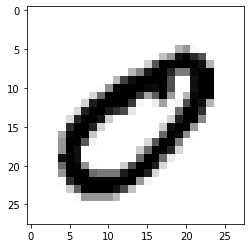

In [45]:
plt.imshow(images[2].numpy().squeeze(), cmap='gray_r');

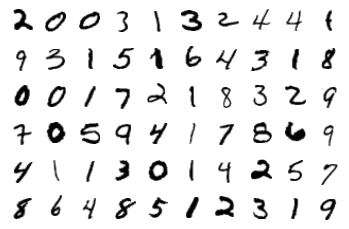

In [46]:
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

**Input layer (the first layer), an output layer of ten neurons (or units, the circles) and two hidden layers in between.**

Input 784 
Hiden layer 128
Hinden Layer 64
output Layer 10

28*28 which is 784 and the input 

In [47]:
in_size = 784
hidden_size = [128, 64]
out_size = 10



In [48]:
model = nn.Sequential(nn.Linear(in_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], out_size),
                      nn.LogSoftmax(dim=1))

In [49]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


1.  ReLU activation ( a simple function which allows positive values to pass through, whereas negative values are modified to zero ).
2. A LogSoftmax function is the logarithm of a Softmax function
**torch.nn.LogSoftmax(dim: Optional[int] = None)**

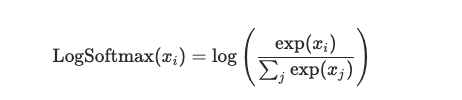

The negative log likelihood loss. 
It is useful to train a classification problem with C classes.

If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. 

This is particularly useful when you have an unbalanced training set.


### **torch.nn.NLLLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean')**

In [ ]:
criterion = nn.NLLLoss()

In [51]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [53]:
images.shape

torch.Size([64, 784])

# **To Calculate Log Probabilities **




In [55]:
logps = model(images) 
logps.shape

torch.Size([64, 10])

## **To Calculate NLL Loss



In [57]:
loss = criterion(logps, labels)

A neural network learns by iterating multiple times over the available data. 


The terms **learn** refers to the adjustment of weights  to minimize the loss.


Before the backward pass, the model weights are set to default **none** values.



The weights are updated once backward() function is called 



In [58]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        ...,
        [-0.0062, -0.0062, -0.0062,  ..., -0.0062, -0.0062, -0.0062],
        [-0.0042, -0.0042, -0.0042,  ..., -0.0042, -0.0042, -0.0042],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005]])



*  We make use of **torch.optim** which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation.



In [59]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15

All optimizers implement a **step()** method, that updates the parameters.This is a simplified version supported by most optimizers.

The function can be called once the gradients are computed using e.g. backward().

In [60]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1) # Flatten MNIST images into a 784 long vector
      optimizer.zero_grad()#Sets the gradients of all optimized torch.Tensor s to zero.
      output = model(images)
      loss = criterion(output, labels)
      loss.backward() #the model learns by backpropagating
      #print('Gradient -', model[0].weight.grad)
      optimizer.step()
      #print('Updated weights - ', model[0].weight)
      running_loss += loss.item()
    else:
      print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))


Epoch 0 - Training loss: 0.6316543988375141
Epoch 1 - Training loss: 0.28687751039004783
Epoch 2 - Training loss: 0.2275097093689861
Epoch 3 - Training loss: 0.18492904287586207
Epoch 4 - Training loss: 0.15427377405288473
Epoch 5 - Training loss: 0.13297168502627787
Epoch 6 - Training loss: 0.11648923187439185
Epoch 7 - Training loss: 0.1046207887929743
Epoch 8 - Training loss: 0.09343919046382025
Epoch 9 - Training loss: 0.0855834922397823
Epoch 10 - Training loss: 0.07821196826474705
Epoch 11 - Training loss: 0.07208053691229269
Epoch 12 - Training loss: 0.0651635836714557
Epoch 13 - Training loss: 0.060215618063225104
Epoch 14 - Training loss: 0.05550860959951128


In [61]:
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Training Time (in minutes) = 19.35792414744695



viewClassify function - image and class probabilities that were predicted



In [64]:
def viewClassify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


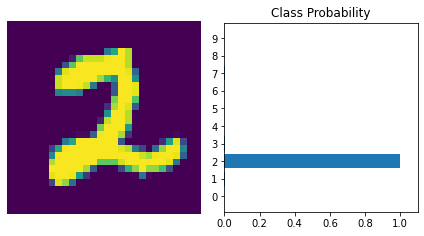

In [65]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
viewClassify(img.view(1, 28, 28), ps)

Iterate through the validation set using a for loop .

Calculate the total number of correct predictions. This is how we can calculate the accuracy.

In [66]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9733


### **Wow! We got over 97.3% accuracy with simple NN**

# We do not want to lose the trained model. 
# Save it !!! Load it and Use it 

In [67]:
torch.save(model, './my_mnist_model.pt') 

Reference:

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

Medium Articles on Neural Network, PyTorch, MNIST.
